In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Pre-processing

In [ ]:
 !pip install -qq -U mlxtend

     |████████████████████████████████| 1.3 MB 3.9 MB/s 


In [ ]:
import pandas as pd
import numpy
from numpy.random import randint
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules
import nltk
from nltk.tokenize import word_tokenize
import re
from nltk.stem import PorterStemmer
from tqdm.auto import tqdm
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from networkx.algorithms.flow import shortest_augmenting_path
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
PORTER_STEMMER = PorterStemmer()

In [ ]:
def clean_tweets(x, STOPWORDS):
    # Lowercase
    sentence = x.lower()
    
    # Remove all non-alphabets (punctuation, numbers, new-line characters and extra-spaces)
    sentence = re.sub('http[s]?://\S+', '', sentence)
    sentence = re.sub(r'([^a-zA-Z ]+?)', '', sentence)
    #print(sentence)
    #sentence = sentence.replace('\n', '')
    # Remove URLs
    sentence = sentence.replace("world health organization", "who")
    #print(sentence)
    # Remove double spacing
    #sentence = re.sub('\s+', ' ', sentence)
    tokenized_tweet = [word for word in word_tokenize(sentence) if word not in STOPWORDS]
    tokenized_tweet = [PORTER_STEMMER.stem(word) for word in tokenized_tweet]
    return tokenized_tweet

<>:6: DeprecationWarning: invalid escape sequence \S
<>:6: DeprecationWarning: invalid escape sequence \S
<>:6: DeprecationWarning: invalid escape sequence \S
<ipython-input-5-e9114ee358bb>:6: DeprecationWarning: invalid escape sequence \S
  sentence = re.sub('http[s]?://\S+', '', sentence)


In [ ]:
pharma_username = ['pfizer']
#'JNJNews', 'AstraZeneca', 'GSK', 'Novartis'
public_username = ['CDCgov', 'IHSgov', 'GovCanHealth', 'GCIndigenous']
ngo_username = ['WHO']

In [ ]:
file1 = '/content/drive/MyDrive/Project 2/data/ngo_who/'+'WHO'+'.csv'
# file2 = '/content/drive/MyDrive/Project 2/data/pharma_companies/'+'Novartis'+'.csv'
# file3 = '/content/drive/MyDrive/Project 2/data/pharma_companies/'+'JNJNews'+'.csv'
# file4 = '/content/drive/MyDrive/Project 2/data/pharma_companies/'+'GSK'+'.csv'
# file5 = '/content/drive/MyDrive/Project 2/data/pharma_companies/'+'AstraZeneca'+'.csv'
Sample_Tweets = pd.concat(
map(pd.read_csv, [file1]), ignore_index=True)
print(Sample_Tweets)
# dataFrame.to_csv('/content/drive/MyDrive/Project 2/gephi/public_health_agencies/public_merged.csv')

                        id                 created_at      conversation_id  \
0      1542588184252628998  2022-06-30 19:17:37+00:00  1542539206593024001   
1      1542583266481504260  2022-06-30 18:58:05+00:00  1542539206593024001   
2      1542577917430996993  2022-06-30 18:36:49+00:00  1542539206593024001   
3      1542571310487949314  2022-06-30 18:10:34+00:00  1542539206593024001   
4      1542566085081403394  2022-06-30 17:49:48+00:00  1542539206593024001   
...                    ...                        ...                  ...   
24576  1212432462422392838  2020-01-01 17:56:39+00:00  1212432462422392838   
24577  1212412667073302528  2020-01-01 16:38:00+00:00  1211948316570849281   
24578  1212403167931125761  2020-01-01 16:00:15+00:00  1212403167931125761   
24579  1212393982665404416  2020-01-01 15:23:45+00:00  1211948316570849281   
24580  1212346627165478914  2020-01-01 12:15:34+00:00  1211948316570849281   

                                                   tweet  retwe

In [ ]:
Sample_Tweets = Sample_Tweets.sample(n=10)

In [ ]:
Sample_Tweets.iloc[0]

id                                                   1542616744874967040
created_at                                     2022-06-30 21:11:07+00:00
conversation_id                                      1542616744874967040
tweet                  Children receive smaller doses of the #COVID19...
retweet_count                                                          1
like_count                                                             7
reply_count                                                           15
quote_count                                                            0
expanded_url           https://twitter.com/CDCgov/status/154261674487...
language                                                              en
possibly_sensitive                                                 False
in_reply_to_user_id                                                  NaN
username                                                          CDCgov
Name: 0, dtype: object

In [ ]:
stopwords_df = set(nltk.corpus.stopwords.words("english"));
# stopwords_df.add("rt")
# stopwords_df.add("amp")
# stopwords_df.add("get")
# stopwords_df.add("It")
print(stopwords_df)

{'hadn', 'have', 'did', 'or', 'a', 'very', 'what', 'to', 'does', 'other', 'wasn', "wasn't", 'how', 'your', 'his', 'its', 'those', 'down', 'nor', 'too', 'who', 'so', "mightn't", 'and', 'shan', 'been', 'of', 'where', 'further', 'hasn', 'because', 'not', "should've", 'm', 'mightn', 'about', 't', 'she', 'don', 'we', "hadn't", 'after', 'are', 'yourselves', 'herself', "mustn't", 'most', 'hers', 'no', 'at', 'on', 'these', 'below', 'should', 'with', 'into', "aren't", 'mustn', 'needn', 'own', 'few', 'once', 'same', 'myself', 'the', "that'll", 'doesn', 'from', 'our', 'ourselves', 'as', 'himself', 'couldn', 'all', 's', 'before', "shan't", 'such', "didn't", "you're", 'both', 'their', 'more', 'will', 'under', 'didn', "shouldn't", 'there', 'is', 'this', 'her', "weren't", "it's", 'won', 'while', "you'd", 'why', 'he', "hasn't", 'each', 'which', "she's", 'themselves', 'against', 'am', 'during', 'between', 'than', 'then', 'if', 'through', 'but', 'was', "won't", 'wouldn', 'theirs', "haven't", 'were', 'ha

#Word Cloud

In [ ]:
df = None
Tweet_Texts=Sample_Tweets['tweet'].values

# Converting the text column as a single string for wordcloud
Tweets_String=str(Tweet_Texts)

# Tweet Text cleaning
import re

# Converting the whole text to lowercase
Tweet_Texts_Cleaned = Tweets_String.lower()

# Removing the twitter usernames from tweet string
Tweet_Texts_Cleaned=re.sub(r'@\w+', ' ', Tweet_Texts_Cleaned)

# Removing the URLS from the tweet string
Tweet_Texts_Cleaned=re.sub(r'http\S+', ' ', Tweet_Texts_Cleaned)


# Deleting everything which is not characters
Tweet_Texts_Cleaned = re.sub(r'[^a-z A-Z]', ' ',Tweet_Texts_Cleaned)

# Deleting any word which is less than 3-characters mostly those are stopwords
Tweet_Texts_Cleaned= re.sub(r'\b\w{1,2}\b', '', Tweet_Texts_Cleaned)

# Stripping extra spaces in the text
Tweet_Texts_Cleaned= re.sub(r' +', ' ', Tweet_Texts_Cleaned)

Tweet_Texts_Cleaned
# for username in pharma_username:

  # Sample_Tweets = pd.read_csv('/content/drive/MyDrive/Project 2/data/pharma_companies/'+username+'.csv')

  #only 10 rows
  # Sample_Tweets = Sample_Tweets[:10]
  
  #clean tweets
  # Extracting only the Tweet text from the data frame
  # Tweet_Texts=Sample_Tweets['tweet'].values

  # # Converting the text column as a single string for wordcloud
  # Tweets_String=str(Tweet_Texts)

  # # Tweet Text cleaning
  # import re

  # # Converting the whole text to lowercase
  # Tweet_Texts_Cleaned = Tweets_String.lower()

  # # Removing the twitter usernames from tweet string
  # Tweet_Texts_Cleaned=re.sub(r'@\w+', ' ', Tweet_Texts_Cleaned)

  # # Removing the URLS from the tweet string
  # Tweet_Texts_Cleaned=re.sub(r'http\S+', ' ', Tweet_Texts_Cleaned)


  # # Deleting everything which is not characters
  # Tweet_Texts_Cleaned = re.sub(r'[^a-z A-Z]', ' ',Tweet_Texts_Cleaned)

  # # Deleting any word which is less than 3-characters mostly those are stopwords
  # Tweet_Texts_Cleaned= re.sub(r'\b\w{1,2}\b', '', Tweet_Texts_Cleaned)

  # # Stripping extra spaces in the text
  # Tweet_Texts_Cleaned= re.sub(r' +', ' ', Tweet_Texts_Cleaned)

  # Tweet_Texts_Cleaned

' science has given powerful tools prevent detect and treat covid use them well the covid pandemic not over but can with vaccinequity the covid vaccine delivery partnership doing this helping countries access funding facilitate delivery engaging with political leaders providing technical assistance such advising targeting vaccination campaigns risk populations happynewyear nto achieve healthforall the will need million more nurses and midwives urging countries healthy resolution limit use alcohol happynewyear healthy resolution say notobacco happynewyear '

In [ ]:
print(Tweet_Texts_Cleaned)

 children receive smaller doses the covid vaccine based their age like the adult vaccine the children vaccine helps keep them from getting seriously sick children and teens may get covid vaccines and other vaccines the same time you have questions talk your healthcare provider june million people have received least one dose covid vaccine those million are fully vaccinated more than million people have received covid booster dose nfind covid vaccine booster near you jordansprinciple can help firstnations children who need educational products services supports such teaching educational assistants find out more learn more about jordansprinciple announce the coming into force bill act respecting first nations inuit and tis children youth and famil 


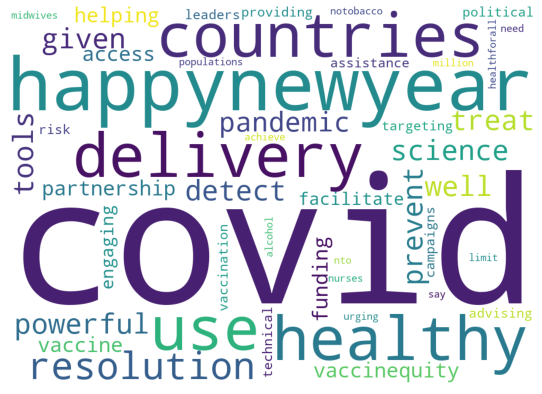

In [ ]:
# Plotting the wordcloud 
# you can specify fonts, stopwords, background color and other options
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Creating the custom stopwords
customStopwords=list(stopwords_df)

wordcloudimage = WordCloud(
                          max_words=100,
                          max_font_size=500,
                          font_step=2,
                          stopwords=customStopwords,
                          background_color='white',
                          width=1000,
                          height=720
                          ).generate(Tweet_Texts_Cleaned)

plt.figure(figsize=(15,7))
plt.axis("off")
plt.imshow(wordcloudimage)
wordcloudimage
plt.show()

#ARM (Itemsets)

In [ ]:
len(pd.read_csv(file1))

24581

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
df = Sample_Tweets
  
#clean tweets
tqdm.pandas()
df["tokenized_tweet"] = df["tweet"].progress_apply(lambda x : clean_tweets(x, stopwords_df))
tokenized_tweets = df["tokenized_tweet"].values.tolist()
te = TransactionEncoder()
te_ary = te.fit(tokenized_tweets).transform(tokenized_tweets)
df = pd.DataFrame(te_ary, columns=te.columns_)


  

  0%|          | 0/24581 [00:00<?, ?it/s]

In [ ]:
#Itemsets


min_sup=0.5
frequent_itemsets = apriori(df, min_support=min_sup, use_colnames=True)
print("len of frequent itemsets: ", len(frequent_itemsets.index))

while(len(frequent_itemsets.index)<100):
  min_sup = min_sup/2
  frequent_itemsets = apriori(df, min_support=min_sup, use_colnames=True)
  print("len of frequent itemsets: ", len(frequent_itemsets.index))

itemsets_df = frequent_itemsets[:100] 
print(itemsets_df)
itemsets_df.to_csv("itemsets.csv");


# for username in pharma_username:

  # df = pd.read_csv('/content/drive/MyDrive/Project 2/data/pharma_companies/'+username+'.csv')
  
  #only 10 rows
  # df = df[:10]
  # df = Sample_Tweets

  # #clean tweets
  # tqdm.pandas()
  # df["tokenized_tweet"] = df["tweet"].progress_apply(lambda x : clean_tweets(x, stopwords_df))
  # tokenized_tweets = df["tokenized_tweet"].values.tolist()
  # te = TransactionEncoder()
  # te_ary = te.fit(tokenized_tweets).transform(tokenized_tweets)
  # df = pd.DataFrame(te_ary, columns=te.columns_)

  # #Itemsets
  
  
  # min_sup=0.5
  # frequent_itemsets = apriori(df, min_support=min_sup, use_colnames=True)
  # print("len of frequent itemsets: ", len(frequent_itemsets.index))

  # while(len(frequent_itemsets.index)<100):
  #   min_sup = min_sup/2
  #   frequent_itemsets = apriori(df, min_support=min_sup, use_colnames=True)
  #   print("len of frequent itemsets: ", len(frequent_itemsets.index))

  # itemsets_df = frequent_itemsets[:100] 
  # print(itemsets_df)
  # itemsets_df.to_csv("itemsets.csv");


covid      15
help       13
optout     11
learn      10
everyon     9
repli       9
effect      8
everi       6
stop        6
friday      6
Name: Items, dtype: int64


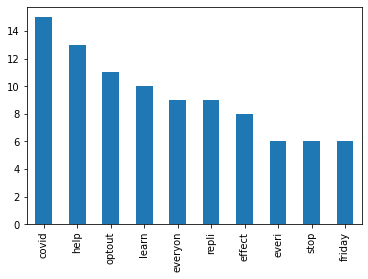

In [ ]:

allItems = []
for i in itemsets_df['itemsets']:
    for j in i:
        allItems.append(j)
        
bar_df = pd.DataFrame(allItems, columns=['Items'])
print(bar_df['Items'].value_counts().head(10))
bar_df['Items'].value_counts().head(10).plot.bar()

In [ ]:
df

,a,aa,aackeri,aacvpr,aadncinfopubsaandccanadaca,aadubyk,aafccanada,aagotii,aaimcloud,aaip,...,zuzubear,zxatun,zxthix,zygmunt,zymeerjemison,zytec,zzellera,zzhennan,zzulfiali,zzz
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65558,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
65559,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
65560,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
65561,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


    Confidence  Number of rules
0          0.0              142
1          0.1              142
2          0.2              142
3          0.3              140
4          0.4              129
5          0.5              101
6          0.6               80
7          0.7               69
8          0.8               55
9          0.9               46
10         1.0                7


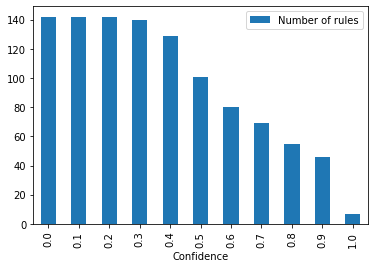

In [ ]:
frequent_itemsets2 = apriori(df, min_support=0.125, use_colnames=True)
frequent_itemsets2

confidence = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
number_of_rules = []

for i in confidence:
    a = association_rules(frequent_itemsets2, metric="confidence", min_threshold=i)
    number_of_rules.append(len(a))

data = {'Confidence': confidence, 'Number of rules': number_of_rules}
df2 = pd.DataFrame(data=data)
print(df2)
plot = df2.plot.bar(x='Confidence', y='Number of rules')

In [ ]:
association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.5)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(learn),(covid),0.226805,0.423059,0.194988,0.859718,2.032147,0.099036,4.112712
1,(lt),(covid),0.169852,0.423059,0.169654,0.998833,2.360979,0.097796,494.216762
2,(repli),(covid),0.341443,0.423059,0.193249,0.565979,1.337825,0.048799,1.329293
3,(covid),(vaccin),0.423059,0.304135,0.275735,0.651765,2.143012,0.147068,1.998262
4,(vaccin),(covid),0.304135,0.423059,0.275735,0.906620,2.143012,0.147068,6.178415
...,...,...,...,...,...,...,...,...,...
96,"(covid, repli)","(stop, vaccin)",0.193249,0.175770,0.174519,0.903078,5.137844,0.140552,8.504068
97,"(covid, vaccin)","(stop, repli)",0.275735,0.224929,0.174519,0.632924,2.813887,0.112498,2.111474
98,"(repli, vaccin)","(stop, covid)",0.178470,0.178805,0.174519,0.977865,5.468888,0.142608,37.099619
99,(repli),"(stop, covid, vaccin)",0.341443,0.175709,0.174519,0.511123,2.908920,0.114525,1.686091


#ARM (Rules)

In [ ]:
matrix_df = pd.DataFrame(columns=['Threshold Support', 'Threshold Confidence', 'Count of rules'])
for min_support_initialize in np.arange(0.01, 0.1, 0.00625): #0.125, 0.5, 0.0625
  for min_threshold_initialize in np.arange(0.5, 1, 0.1):
    frequent_itemsets_temp = apriori(df, min_support=min_support_initialize, use_colnames=True)
    if(frequent_itemsets_temp.empty):
      continue
    rules = association_rules(frequent_itemsets_temp, metric="confidence", min_threshold=min_threshold_initialize)
  # rules = rules.sort_values(by='confidence', ascending =False)
  # print(rules)
    matrix_df.loc[len(matrix_df.index)] = [min_support_initialize, min_threshold_initialize, len(rules.index)] 
  
print(matrix_df)

    Threshold Support  Threshold Confidence  Count of rules
0              0.0100                   0.5          1783.0
1              0.0100                   0.6          1252.0
2              0.0100                   0.7          1099.0
3              0.0100                   0.8          1022.0
4              0.0100                   0.9           930.0
..                ...                   ...             ...
70             0.0975                   0.5             1.0
71             0.0975                   0.6             0.0
72             0.0975                   0.7             0.0
73             0.0975                   0.8             0.0
74             0.0975                   0.9             0.0

[75 rows x 3 columns]


In [ ]:
matrix_df.to_csv('Support vs Confidence for WHO.csv')

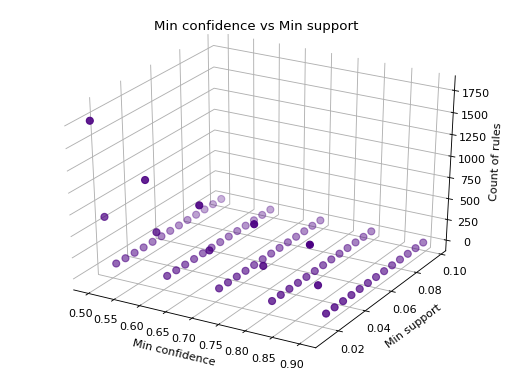

In [ ]:
from IPython.core.pylabtools import figsize
# importing mplot3d toolkits, numpy and matplotlib
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import itertools
fig = plt.figure(figsize=(8, 6), dpi=80)

# syntax for 3-D projection
ax = plt.axes(projection ='3d', )

# defining all 3 axes
z = matrix_df['Count of rules']
x = matrix_df['Threshold Confidence']
y = matrix_df['Threshold Support']

# plotting

ax.scatter(x, y, z, color='indigo', s=40)
ax.set_title('Min confidence vs Min support')
ax.set_xlabel('Min confidence')
ax.set_ylabel('Min support')

# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

# ax.grid(False)

ax.set_zlabel('Count of rules')
plt.show()


In [ ]:
# 0              0.1250                   0.5           101.0

# 4              0.01                   0.8         0
frequent_itemsets_temp = apriori(df, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets_temp, metric="confidence", min_threshold=0.8)
rules[rules['lift']>=1]
print(rules)

                       antecedents  \
0                        (variant)   
1                         (worker)   
2                        (pahowho)   
3                        (pahowho)   
4                        (pahowho)   
...                            ...   
1017  (whosearo, pahowho, drtedro)   
1018            (whowpro, drtedro)   
1019           (whoeurop, drtedro)   
1020            (pahowho, drtedro)   
1021           (whosearo, drtedro)   

                                          consequents  antecedent support  \
0                                             (covid)            0.013303   
1                                            (health)            0.023311   
2                                           (whoafro)            0.024368   
3                                           (whoemro)            0.024368   
4                                          (whoeurop)            0.024368   
...                                               ...                 ...   
1017

In [ ]:
type(rules)

pandas.core.frame.DataFrame

In [ ]:
df1 = (rules.explode('antecedents')
         .reset_index(drop=True)
         .explode('consequents')
         .reset_index(drop=True))
df1.to_csv('WHO rules.csv')

#Bokeh plot

In [ ]:
import pandas as pd
import networkx
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!pip install bokeh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bokeh.io import output_notebook, show, save

In [ ]:
got_df = pd.read_csv('/content/WHO rules.csv')

In [ ]:
G = networkx.from_pandas_edgelist(got_df, 'antecedents', 'consequents')

In [ ]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx

In [ ]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine, EdgesAndLinkedNodes, NodesAndLinkedEdges, LabelSet
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
from bokeh.transform import linear_cmap
from networkx.algorithms import community

In [ ]:
degrees = dict(networkx.degree(G))
networkx.set_node_attributes(G, name='degree', values=degrees)
number_to_adjust_by = 5
adjusted_node_size = dict([(node, degree+number_to_adjust_by) for node, degree in networkx.degree(G)])
networkx.set_node_attributes(G, name='adjusted_node_size', values=adjusted_node_size)

In [ ]:
title="Bokeh Plot for WHO"

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [("Character", "@index")]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

#Create a network graph object with spring layout
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
network_graph = from_networkx(G, networkx.spring_layout, scale=10, center=(0, 0))

#Set node size and color
network_graph.node_renderer.glyph = Circle(size=15, fill_color='skyblue')

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

#Add network graph to the plot
plot.renderers.append(network_graph)

#Add Labels
x, y = zip(*network_graph.layout_provider.graph_layout.values())
node_labels = list(G.nodes())
source = ColumnDataSource({'x': x, 'y': y, 'name': [node_labels[i] for i in range(len(x))]})
labels = LabelSet(x='x', y='y', text='name', source=source, background_fill_color='white', text_font_size='10px', background_fill_alpha=.7)
plot.renderers.append(labels)


show(plot)
#save(plot, filename=f"{title}.html")

In [ ]:
save(plot, filename=f"{title}.html")

/usr/local/lib/python3.7/dist-packages/bokeh/io/saving.py:126: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
/usr/local/lib/python3.7/dist-packages/bokeh/io/saving.py:139: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'/content/Bokeh Plot for WHO.html'

#Followers (Maybe not)

In [ ]:
# !pip install -U -qq tweepy

In [ ]:
import tweepy

In [ ]:
# Initialize bearer token and client
bearer_token = "AAAAAAAAAAAAAAAAAAAAAD2hVAEAAAAAjBhkrfvf%2BEftzMPhDJt1oXHLCh4%3D0J5mIvBgW81rnqoNcUXOFMOCqv83ANsZZoELvCvxAYiYnUm4Ql"
client = tweepy.Client(bearer_token=bearer_token)

AttributeError: ignored

In [ ]:
def getUserInfo(client,username):
    user = client.get_user(username=username,user_fields='public_metrics')
    return user


d =getUserInfo(client,'pfizer')

d.data.public_metrics['followers_count']

In [ ]:
client.get_users_followers(id=56488059, max_results=100)

In [ ]:
def getTargetFollowers(n=100, m=150):
  screen_name = 'JoeBiden'
  target_followers = list()
  n = m
  f = tweepy.Cursor(api.get_followers(), screen_name).items(n)
  for fol in f:
    if not fol.protected:
      target_followers.append(fol.screen_name)
    if len(target_followers) == n:
      break
  print(len(target_followers))
  dff = pd.DataFrame(columns=target_followers)
  print(dff.shape)
  return(dff)

#Metrics
Recommender systems can also profit from the messages shared on social media 

The higher the popularity of a tweet, the more likely it is to contain highly supported association rule.




In [ ]:
Sample_Tweets['Tweet_rank'] = Sample_Tweets['like_count']+Sample_Tweets['quote_count']+Sample_Tweets['reply_count']+Sample_Tweets['retweet_count']

In [ ]:
Sample_Tweets = Sample_Tweets.sort_values(by=['Tweet_rank'], ascending=False)


In [ ]:
Sample_Tweets["tokenized_tweet"] = Sample_Tweets["tweet"].progress_apply(lambda x : clean_tweets(x, stopwords_df))


  0%|          | 0/24581 [00:00<?, ?it/s]

In [ ]:
Sample_Tweets

,id,created_at,conversation_id,tweet,retweet_count,like_count,reply_count,quote_count,expanded_url,language,possibly_sensitive,in_reply_to_user_id,username,tokenized_tweet,Tweet_rank
24303,1217043229427761152,2020-01-14 11:18:12+00:00,1217043229427761152,Preliminary investigations conducted by the Ch...,23372,29369,15873,51657,https://twitter.com/WHO/status/121704322942776...,en,False,NaN,WHO,"[preliminari, investig, conduct, chines, autho...",120271
21955,1237777021742338049,2020-03-11 16:26:53+00:00,1237774421307228160,"🚨 BREAKING 🚨\n\n""We have therefore made the as...",51313,52822,2011,13211,https://twitter.com/WHO/status/123777702174233...,en,False,14499829.0,WHO,"[break, therefor, made, assess, covid, charact...",119357
21233,1243972193169616898,2020-03-28 18:44:17+00:00,1243972193169616898,FACT: #COVID19 is NOT airborne. \n\nThe #coron...,39560,44307,2809,4266,https://twitter.com/WHO/status/124397219316961...,en,False,NaN,WHO,"[fact, covid, airborn, coronaviru, mainli, tra...",90942
21970,1237721991471382528,2020-03-11 12:48:13+00:00,1237721991471382528,These are 7 simple steps to protect yourself a...,31615,37607,604,1804,http://bit.ly/337yabc,en,False,NaN,WHO,"[simpl, step, protect, other, covid, coronaviru]",71630
14887,1313841832598687749,2020-10-07 14:01:17+00:00,1313841832598687749,We are thrilled to have @SuperM joining our Bi...,18175,45970,913,2899,https://bit.ly/WHOBigEventforMentalHealth,en,False,NaN,WHO,"[thrill, superm, join, big, event, mental, hea...",67957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,1522099819740909570,2022-05-05 06:24:10+00:00,1522099819740909570,https://t.co/BmNCAD0jmf,0,0,0,0,https://twitter.com/WHO/status/152209981974090...,zxx,False,NaN,WHO,[],0
11649,1356994405111128072,2021-02-03 15:54:12+00:00,1356994405111128072,https://t.co/wSojwxGRa5,0,0,0,0,https://twitter.com/WHO/status/135699440511112...,zxx,False,NaN,WHO,[],0
19048,1262368554042654720,2020-05-18 13:04:51+00:00,1262368554042654720,https://t.co/FUUYdc2Iv0,0,0,0,0,https://twitter.com/WHO/status/126236855404265...,zxx,False,NaN,WHO,[],0
19046,1262369680397918208,2020-05-18 13:09:20+00:00,1262369680397918208,https://t.co/qKkZVnASif,0,0,0,0,https://twitter.com/WHO/status/126236968039791...,zxx,False,NaN,WHO,[],0


In [ ]:
Sample_Tweets["tokenized_tweet"]

24303    [preliminari, investig, conduct, chines, autho...
21955    [break, therefor, made, assess, covid, charact...
21233    [fact, covid, airborn, coronaviru, mainli, tra...
21970     [simpl, step, protect, other, covid, coronaviru]
14887    [thrill, superm, join, big, event, mental, hea...
                               ...                        
1086                                                    []
11649                                                   []
19048                                                   []
19046                                                   []
18943                                                   []
Name: tokenized_tweet, Length: 24581, dtype: object

In [ ]:
type(Sample_Tweets['tokenized_tweet'])

pandas.core.series.Series

In [ ]:
sorted_df = Sample_Tweets['tokenized_tweet']

In [ ]:
sorted_df.to_csv('sorted.csv')

In [ ]:
Sample_Tweets.iloc[0]['tweet']

'Preliminary investigations conducted by the Chinese authorities have found no clear evidence of human-to-human transmission of the novel #coronavirus (2019-nCoV) identified in #Wuhan, #China🇨🇳. https://t.co/Fnl5P877VG'

In [ ]:
rules['rank'] = rules['antecedent support']+rules['confidence']+rules['consequent support']+rules['leverage']+rules['lift']+rules['support']+rules['conviction']

In [ ]:
sorted_rules = rules.sort_values(by=['rank'], ascending=False)

In [ ]:
sorted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,rank
285,"(whoafro, whowpro, pahowho)",(whosearo),0.019609,0.023555,0.019609,1.000000,42.454231,0.019147,inf,inf
691,"(whoemro, whoeurop, whowpro)","(whosearo, pahowho)",0.019527,0.019812,0.019527,1.000000,50.474333,0.019140,inf,inf
820,"(whoeurop, whowpro, whoafro, pahowho, drtedro)",(whosearo),0.010089,0.023555,0.010089,1.000000,42.454231,0.009851,inf,inf
365,"(whoemro, whoafro, whowpro)",(whosearo),0.019527,0.023555,0.019527,1.000000,42.454231,0.019067,inf,inf
363,"(whoemro, whosearo, whowpro)",(whoafro),0.019527,0.037915,0.019527,1.000000,26.374464,0.018787,inf,inf
...,...,...,...,...,...,...,...,...,...,...
127,"(media, brief, drtedro)",(covid),0.012855,0.405232,0.010821,0.841772,2.077261,0.005612,3.758936,7.112490
19,"(pandem, vaccin)",(covid),0.012001,0.405232,0.010008,0.833898,2.057831,0.005144,3.580748,6.904862
13,"(media, brief)",(covid),0.015337,0.405232,0.012774,0.832891,2.055346,0.006559,3.559169,6.887308
16,"(coronaviru, countri)",(covid),0.012083,0.405232,0.010008,0.828283,2.043974,0.005112,3.463651,6.768341


In [ ]:
type(sorted_rules['antecedents'])

pandas.core.series.Series

#Accuracy

Compare sorted_rules['antecedents']+sorted_rules['consequents]' with Sample_tweets['tokenized_tweet'] using iloc

In [ ]:
type(list(sorted_rules.iloc[0]['antecedents']))

list

In [ ]:
count=0
l1 = list(sorted_rules.iloc[0]['antecedents'])
for value in l1:
  if value in sorted_df.iloc[0]:
    count=count+1
l2 = list(sorted_rules.iloc[0]['consequents'])
if(count==len(l1)):
  for value in l2:
    if value in sorted_df.iloc[0]:
      count=count+1
if(count==len(l1)+len(l2)):
  print("exists")
else:
  print("does not exist")

exists


In [ ]:
len(sorted_rules.index)

1022

In [ ]:
len(sorted_df.index)

24581

In [ ]:
sorted_df

24303    [preliminari, investig, conduct, chines, autho...
21955    [break, therefor, made, assess, covid, charact...
21233    [fact, covid, airborn, coronaviru, mainli, tra...
21970     [simpl, step, protect, other, covid, coronaviru]
14887    [thrill, superm, join, big, event, mental, hea...
                               ...                        
1086                                                    []
11649                                                   []
19048                                                   []
19046                                                   []
18943                                                   []
Name: tokenized_tweet, Length: 24581, dtype: object

In [ ]:
counter=0

save_df = pd.DataFrame(columns=['Tweet ID (iloc)', 'tweet', 'tokenized', 'Rule No.', 'rule', 'Username'])
# matrix_df.loc[len(matrix_df.index)] = [min_support_initialize, min_threshold_initialize, len(rules.index)] 
for i in range (0, 2458, 1): #data
  for j in range(0, 1022, 1): #rules
    count=0
    l1 = list(sorted_rules.iloc[j]['antecedents'])
    for value in l1:
      if value in sorted_df.iloc[i]:
        count=count+1
    l2 = list(sorted_rules.iloc[j]['consequents'])
    if(count==len(l1)):
      for value in l2:
        if value in sorted_df.iloc[i]:
          count=count+1
    if(count==len(l1)+len(l2)):
      save_df.loc[len(save_df.index)] = [i, Sample_Tweets.iloc[i]['tweet'], Sample_Tweets.iloc[i]["tokenized_tweet"], j, list(sorted_rules.iloc[j]['antecedents'])+list(sorted_rules.iloc[j]['consequents']), Sample_Tweets.iloc[i]['username']]
      # print("Tweet ", i, " contains rule number ", j)
      counter=counter+1 
# for i in range(0, 5, 1):
#   for j in range(0, 75798, 1):
#     count=0
#     l1 = list(sorted_rules.iloc[j]['antecedents'])
#     for value in l1:
#       if value in sorted_df.iloc[i]:
#         count=count+1
#     l2 = list(sorted_rules.iloc[j]['consequents'])
#     if(count==len(l1)):
#       for value in l2:
#         if value in sorted_df.iloc[i]:
#           count=count+1
#     if(count==len(l1)+len(l2)):
#       print(j, " exists at ", i)
#       counter=counter+1
#     else:
#       print("does not exist")

In [ ]:
save_df

,Tweet ID (iloc),tweet,tokenized,Rule No.,rule,Username
0,15,"RT @DrTedros: Thank you, @BTS_twt, for includi...","[rt, drtedro, thank, btstwt, includ, sign, lan...",1010,"[thank, rt, drtedro]",WHO
1,15,"RT @DrTedros: Thank you, @BTS_twt, for includi...","[rt, drtedro, thank, btstwt, includ, sign, lan...",1011,"[thank, drtedro, rt]",WHO
2,24,"RT @DrTedros: Thank you, #BTS for the upliftin...","[rt, drtedro, thank, bt, uplift, btsdynamit, r...",1010,"[thank, rt, drtedro]",WHO
3,24,"RT @DrTedros: Thank you, #BTS for the upliftin...","[rt, drtedro, thank, bt, uplift, btsdynamit, r...",1011,"[thank, drtedro, rt]",WHO
4,25,@DrTedros @WHOWPRO @WHOSEARO @pahowho @WHO_Eur...,"[drtedro, whowpro, whosearo, pahowho, whoeurop...",0,"[whoafro, whowpro, pahowho, whosearo]",WHO
...,...,...,...,...,...,...
46836,2456,Media briefing on #COVID19 with @DrTedros http...,"[media, brief, covid, drtedro]",1013,"[media, covid, brief, drtedro]",WHO
46837,2456,Media briefing on #COVID19 with @DrTedros http...,"[media, brief, covid, drtedro]",1014,"[media, brief, drtedro]",WHO
46838,2456,Media briefing on #COVID19 with @DrTedros http...,"[media, brief, covid, drtedro]",1017,"[media, brief, drtedro, covid]",WHO
46839,2456,Media briefing on #COVID19 with @DrTedros http...,"[media, brief, covid, drtedro]",1019,"[media, brief, covid]",WHO


In [ ]:
counter

46841

In [ ]:
save_df.to_csv('final WHO.csv')

In [ ]:
counter_0to20=0
counter_21to40=0
counter_41to60=0
counter_61to80=0
counter_81to100=0
counter_remaining=0
x=0
i=0
for index, row in save_df.iterrows():
  if(row['Tweet ID (iloc)'])<=500:
    counter_0to20=counter_0to20+1
  elif(row['Tweet ID (iloc)'])<=1000:
    counter_21to40=counter_21to40+1
  elif(row['Tweet ID (iloc)'])<=1500:
    counter_41to60=counter_41to60+1
  elif(row['Tweet ID (iloc)'])<=2000:
    counter_61to80=counter_61to80+1
  else: 
    x=x+1

In [ ]:
print(counter_0to20, " ", counter_21to40, " ", counter_41to60, " ", counter_61to80, " ", x)

6846   14851   11967   5480   7697


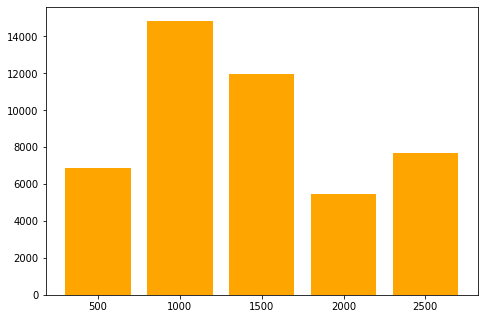

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
lim = ['500', '1000', '1500', '2000', '2500']
val = [counter_0to20,counter_21to40,counter_41to60,counter_61to80,x]
ax.bar(lim,val, color = 'orange')
plt.show()